# Project

***

### 1. Introduction

*Explain what supervised learning is and what classification algorithms are.*

In supervised learning, models are trained on a labeled dataset, where the input features are associated with corresponding target labels (classes). Essentially the model 'learns' from labelled training data to make predictions about unseen data. In the case of the iris data set the goal would be to best predict with a degree of accuracy what classification or category a new dataset would fit in to based off the current iris dataset. The training dataset consists of input features (X) and corresponding target labels (y).

Classification is a type of supervised learning that involves predicting the category or class of a given input based on its features. For the iris data set these features are sepal length, sepal width, petal length and petal width. 

For this project, we will explore classification algorithms using the Iris Flower dataset.

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.tree import export_text

import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Load iris data set.
df = pd.read_csv('data/iris.csv')

# Show.
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
# Split the dataset into features (X) and target labels (y)
X = df.drop('class', axis=1)
y = df['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

### 2. Cross Validation

When learning the parameters of a dataset and testing it on the same dataset there can be a risk of overfitting as the learning and predicting is happening on the same dataset. To avoid this potential problem it is common to split the dataset in 'test' and 'train' data, holding out a portion of the dataset for a test. When evaluating different settings for estimators there can still be a risk of overfitting on the 'test' set because the parameters may be tweaked until the estimator performs optimally. Cross Validation is seen as a solution to this problem as it splits off another portion of the data for evaluation without reducing the number of samples used for the learning model.

https://scikit-learn.org/stable/modules/cross_validation.html

A good understanding of Cross Validation is available at the following resource.
https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

### 3. Classification Algorithms

Classification algorithms aim to predict the class or category of a given input. A summary prepared at The University of Toronto yielded the following results for various different classification algorithms.
- Logistic Regression:  0.933333  (0.050000)
- Linear Discriminant Analysis:  0.975000  (0.038188)
- K Nearest Neigbors:  0.958333  (0.055902)
- CART:  0.950000  (0.040825)
- Support Vector Machine:  0.950000  (0.076376)
- Guassian Naive Bayes:  0.966667  (0.055277)
https://www.cs.toronto.edu/~mhsadi/code-repository/MachineLearningNotebooks/1-IrisDataset.html

The study below uses 3 different classifiers and achieves an accuracy of 97%:
- Support Vector Machine
- Random Forest and
- Gradient Boost
These models were trained on the training data (80%), and their performance was evaluated using testing data (20%).
https://www.embedded-robotics.com/iris-dataset-classification/

This study for the Decision Tree Classifier yields 100% for training data, and 94.7%, for the test dataset.
https://www.educative.io/answers/how-to-build-a-decision-tree-with-the-iris-dataset-in-python

These results show that it is worth attempting a number of different classifiers ourselves to determine which is the most suitable as various different references online yielded different results, for example this paper by Abdulazeez et al. showed KNN to be the most accurate at 100% (https://www.researchgate.net/publication/351328500_Machine_Learning_Classifiers_Based_Classification_For_IRIS_Recognition).

Ultimately what I've concluded from my brief research is that the classification algorithm chosen for this project would not contain much significance as the overall objective is autonomous learning and all the classifiers compared provide more than adequate results for what is considered a clean dataset with no outliers. The differences could be down to a number of different factors but as already mentioned these differences place no major significance at this point and are outside the scope of this project.

In [30]:
# Initialize classifiers
clf_dt = DecisionTreeClassifier(random_state=42)
clf_knn = KNeighborsClassifier()
clf_rf = RandomForestClassifier(random_state=42)

# Perform 10-fold cross-validation
cv_scores_dt = cross_val_score(clf_dt, X, y, cv=10)
cv_scores_knn = cross_val_score(clf_knn, X, y, cv=10)
cv_scores_rf = cross_val_score(clf_rf, X, y, cv=10)

# Print average cross-validation scores
print(f'Decision Tree Average Accuracy: {cv_scores_dt.mean():.2f}')
print(f'KNN Average Accuracy: {cv_scores_knn.mean():.2f}')
print(f'Random Forest Average Accuracy: {cv_scores_rf.mean():.2f}')

Decision Tree Average Accuracy: 0.95
KNN Average Accuracy: 0.97
Random Forest Average Accuracy: 0.96


### 4. Decision Tree Classifier

I will put a further emphasis on the Decision Tree Classifier over the others. This is mainly because a Decision Tree Classifier was initially unintentionally adopted by myself through first principles with one of my first assignments as a method to classify the iris data set. The scope of the assignment was to logically think through how to classify the dataset. At this early point in my Data Analytics journey I didn't have much knowledge or background (or any for that matter) in the field of Machine Learning. My github repository which last had a commit on 08May2022 can be found at the link below 
https://github.com/mhmdmahdi/pands-project/blob/main/analysis.py

In summary, I used a number of conditions to try and classify the data.

In [ ]:
conditions = [
    (df['petal length (cm)'] <= 2.1),
    (df['petal length (cm)'] <= 4.95) & (df['petal width (cm)'] <= 1.65),
    (df['petal length (cm)'] >= 4.94) & (df['petal length (cm)'] <= 5.15) & (
        df['petal width (cm)'] >= 1.55) & (df['petal width (cm)'] <= 1.71),
    (df['petal width (cm)'] >= 1.6) & (df['petal length (cm)'] >= 5.2),
    (df['petal width (cm)'] >= 1.52) | (df['petal length (cm)'] >= 1.51)
]
# Created a list of conditions with specified criteria

values = [0, 1, 1, 2, 2]
# Defined the list of values to use if the Conditions above were met

Unknowingly I had developed, what is essentially the foundations of a Decision Tree Classifier, and so at the conclusion of this course it would only be fitting that I use the classifier provided by sklearn as opposed to trying to build it myself. 

In [36]:
# Use export_text to generate a textual representation of the Decision Tree
tree_rules = export_text(clf_dt, feature_names=list(X.columns))

# Print the textual representation of the Decision Tree
print(tree_rules)

|--- petal_length <= 2.45
|   |--- class: setosa
|--- petal_length >  2.45
|   |--- petal_length <= 4.75
|   |   |--- petal_width <= 1.65
|   |   |   |--- class: versicolor
|   |   |--- petal_width >  1.65
|   |   |   |--- class: virginica
|   |--- petal_length >  4.75
|   |   |--- petal_width <= 1.75
|   |   |   |--- petal_length <= 4.95
|   |   |   |   |--- class: versicolor
|   |   |   |--- petal_length >  4.95
|   |   |   |   |--- petal_width <= 1.55
|   |   |   |   |   |--- class: virginica
|   |   |   |   |--- petal_width >  1.55
|   |   |   |   |   |--- petal_length <= 5.45
|   |   |   |   |   |   |--- class: versicolor
|   |   |   |   |   |--- petal_length >  5.45
|   |   |   |   |   |   |--- class: virginica
|   |   |--- petal_width >  1.75
|   |   |   |--- petal_length <= 4.85
|   |   |   |   |--- sepal_width <= 3.10
|   |   |   |   |   |--- class: virginica
|   |   |   |   |--- sepal_width >  3.10
|   |   |   |   |   |--- class: versicolor
|   |   |   |--- petal_length >  4.

This representation above shows the decision rules at each node of the tree. Each decision node is associated with a feature and a threshold value, and the tree branches based on whether the condition is true or false.

Known for its interpretability and ease of visualization, “Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.”

https://scikit-learn.org/stable/modules/tree.html

### 5. Preprocessing

As the iris dataset is a well known dataset which is considered a clean dataset no preprocessing is needed in order to 'normalise' or 'scale' the data. Decision Tree Classifiers are also not sensitive to the scale of features, so feature scaling (e.g., standardization or normalization) is generally unnecessary for Decision Trees. 

Other preprocessing steps that could be implemented if needed are:
- Handling missing values
- Feature scaling (not necessary for Decision Trees)
- Outlier handling (not necessary for the Iris dataset) 
- Categorical encoding (not required for the Iris dataset)

https://www.kaggle.com/code/shikhnu/decision-tree-iris-dataset

### 6. Evaluation Metrics and Cost Function of Decision Tree Classifier
Evaluation metrics such as accuracy, precision, recall, and confusion matrix are used to assess the model's performance.

In [39]:
# Perform 10-fold cross-validation
cv_predictions = cross_val_predict(clf_dt, X, y, cv=10)
cv_scores = cross_val_score(clf_dt, X, y, cv=10, scoring='accuracy')

# Calculate evaluation metrics
accuracy = accuracy_score(y, cv_predictions)
precision = precision_score(y, cv_predictions, average='weighted')
recall = recall_score(y, cv_predictions, average='weighted')
conf_matrix = confusion_matrix(y, cv_predictions)

# Print metrics
print(f'Average Cross-Validation Accuracy: {cv_scores.mean():.2f}')
print(f'Overall Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print('\nConfusion Matrix:\n', conf_matrix)

Average Cross-Validation Accuracy: 0.95
Overall Accuracy: 0.95
Precision: 0.95
Recall: 0.95

Confusion Matrix:
 [[50  0  0]
 [ 0 47  3]
 [ 0  4 46]]


### 7. Results and Discussion
The model's results and performance metrics are presented above:
- An Average Cross Validation Accuracy of 0.95 (95%) indicates that the model achieved an accuracy of 95% across the 10 folds of the cross-validation. Accuracy is the ratio of correctly predicted observations to the total observations.
- The Overall Accuracy calculated by comparing the model's predictions to the true labels across the entire dataset also shows an accuracy of 95%.
- Precision: Precision is the number of true positives divided by the sum of true positives and false positives. It represents the accuracy of the positive predictions and shows that the model is correct 95% of the time on average.
- Recall (Sensitivity): Recall is the number of true positives divided by the sum of true positives and false negatives. It indicates that the model is good at capturing the instances of each class as it also stands at 95%.


The confusion matrix table shows the counts of true positive, true negative, false positive, and false negative predictions.
In our Confusion Matrix:
- For setosa, all 50 instances were correctly predicted (true positives), with no false positives or false negatives.
- For versicolor, 47 instances were correctly predicted (true positives), with 3 false positives and 4 false negatives.
- For virginica, 46 instances were correctly predicted (true positives), with 4 false positives and 3 false negatives.

In summary, the model seems to perform well across various metrics, with high accuracy, precision, and recall

### 8. Statistical Analysis

In [49]:
# Descriptive Statistics
descriptive_stats = df.describe()
descriptive_stats

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [50]:
# Class-wise Statistics
class_stats = df.groupby('class').describe()
class_stats

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
class                                                                 
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
class                          ...                                        
setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
class                                          
setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

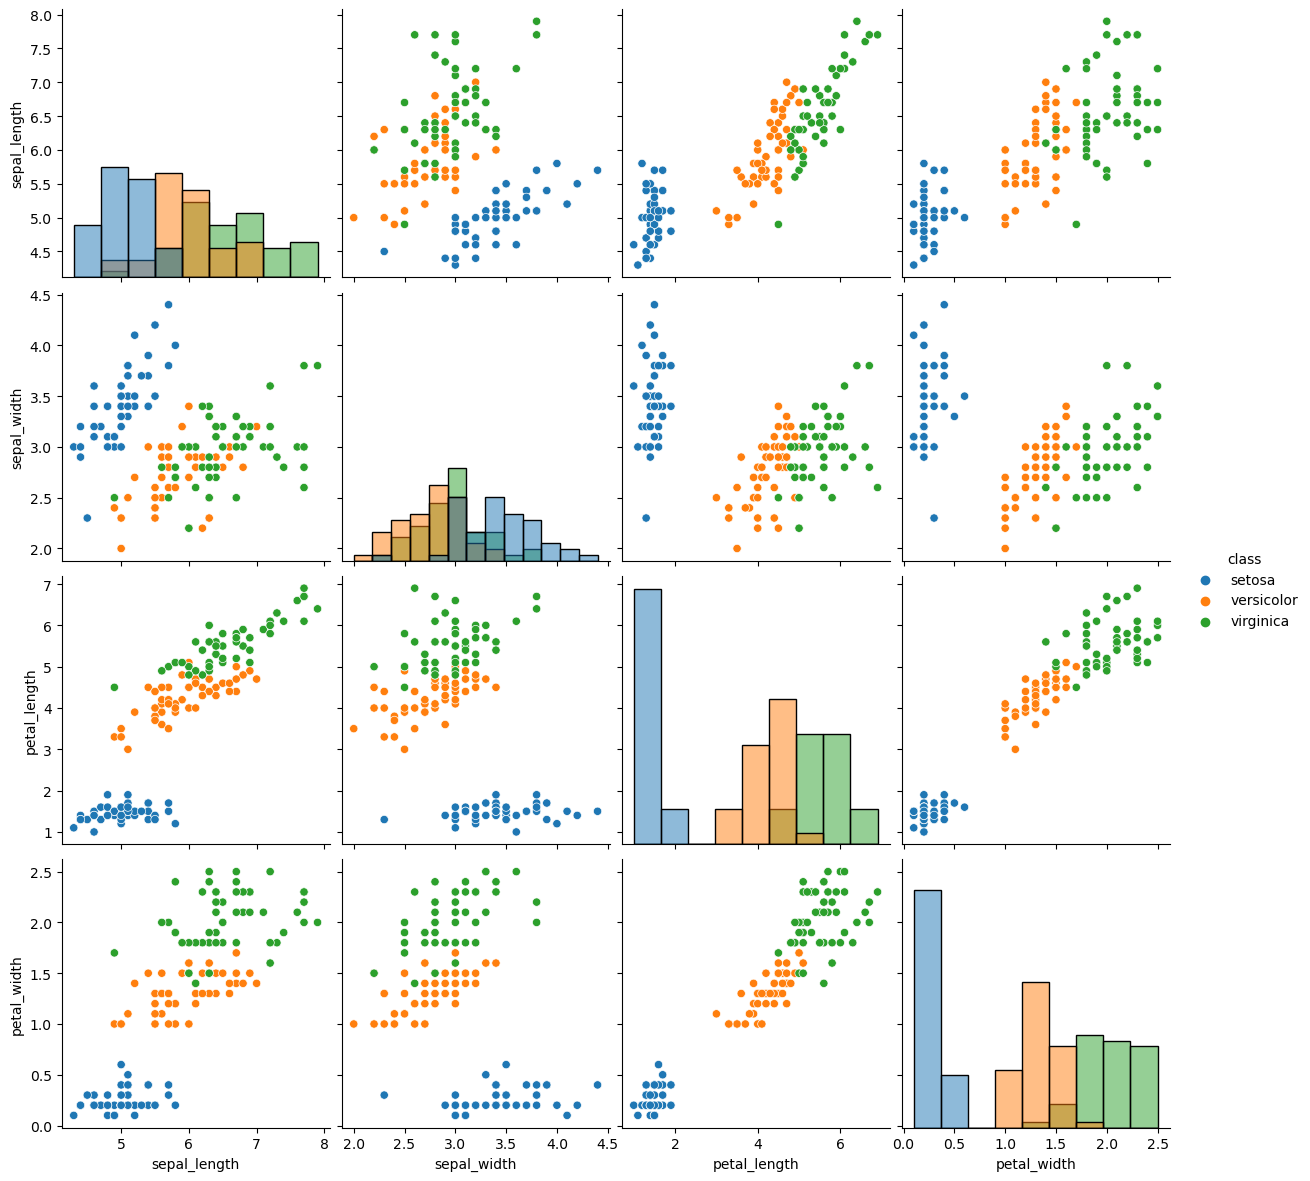

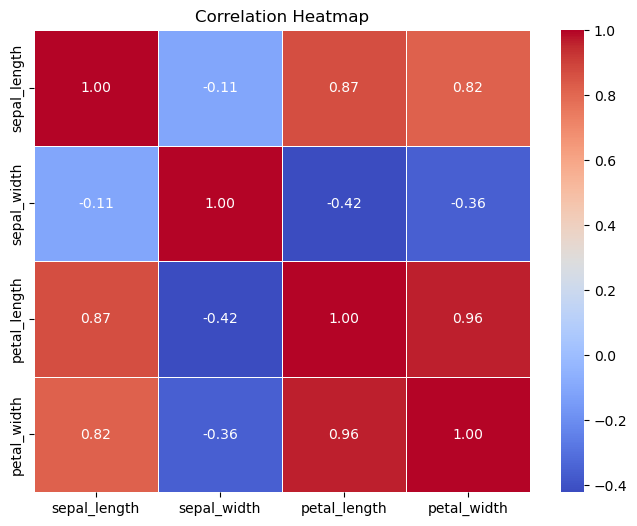

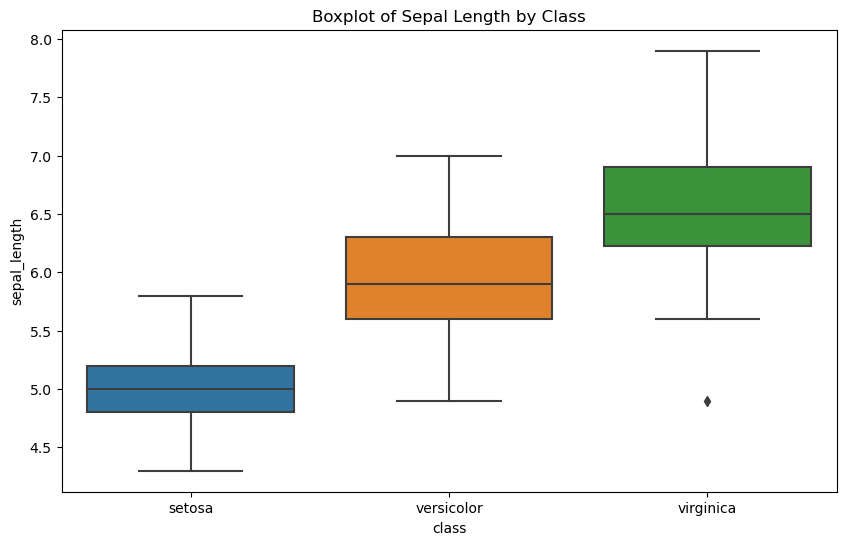

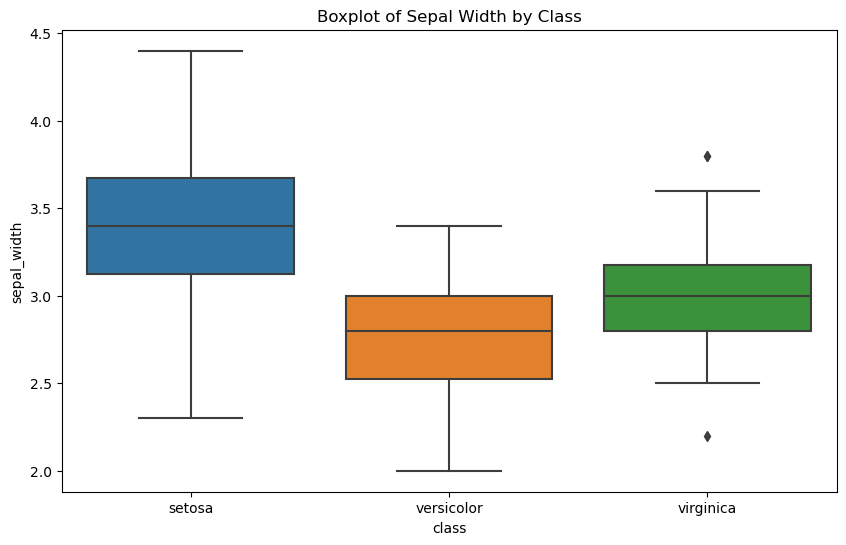

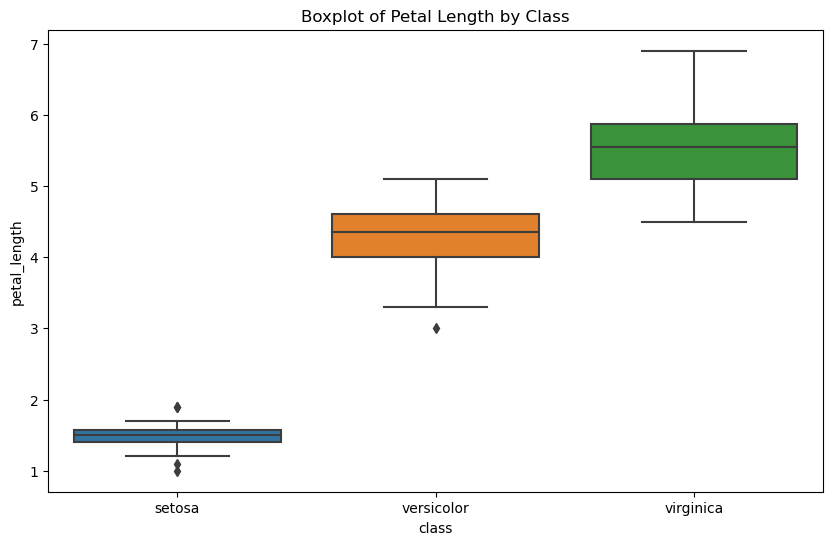

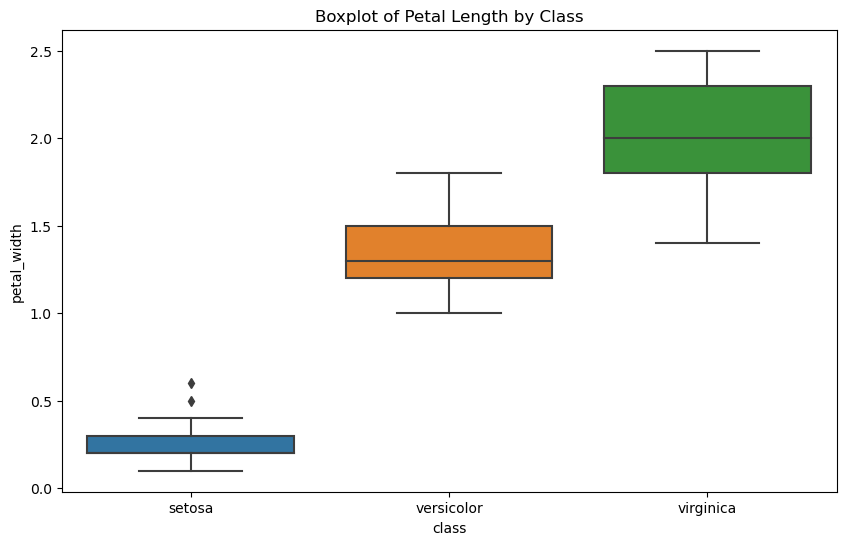

In [54]:
# Feature Distributions
sns.pairplot(df, hue='class', diag_kind='hist', height=3)

# Correlation Analysis
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')

# Outlier Detection (using boxplots)
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='sepal_length', data=df)
plt.title('Boxplot of Sepal Length by Class')

plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='sepal_width', data=df)
plt.title('Boxplot of Sepal Width by Class')

plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='petal_length', data=df)
plt.title('Boxplot of Petal Length by Class')

plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='petal_width', data=df)
plt.title('Boxplot of Petal Length by Class')

# Display plots
plt.show()

##### Feature Distributions:
- Helps visualize the distribution of each feature using histograms and plots. This helps to understand the range and spread of values for each feature.

##### Correlation Analysis:
- Correlation analysis helps identify relationships between variables by utilising correlation matrices and heatmaps to visualize correlations.

##### Outlier Detection:
- Identify and analyze potential outliers in the dataset which may provide insights into anomalous observations or errors in the data.
- Decision Trees are generally robust to outliers and the presence of a few outliers might not significantly impact the overall structure of the tree. 
- From the above boxplots we can see that there are not many outliers and based on a 95% accuracy we can safely assume that removing outliers would not have had a significant impact as another study at the below link removed the outliers from their dataset and still achieved an accuracy of 95% with the Decision Tree Classifier 

https://www.kaggle.com/code/shikhnu/decision-tree-iris-dataset

### 9. Optimisation/ Hyperparamater Tuning: